# Supervised Learning - Ensemble Modeling, Random Forest Tree, Bagging, Boosting, Stacking and Voting 

In [ ]:
# Build an ensemble model to correctly classify the outcome variable and improve your model prediction by using GridSearchCV using cancer dataset.

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from feature_engine.outliers import Winsorizer
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
import xgboost as xgb

#Hyperparameter optimization
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

import sklearn.metrics as skmet
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
cancer_data = pd.read_csv(r"D:\360digi\DS\Sharath\Ensemble_Technique_2\handson\Datasets_ET\Tumor_Ensemble.csv")
cancer_data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,87139402,B,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,...,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,8910251,B,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,...,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,905520,B,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,...,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,868871,B,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,...,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,9012568,B,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,...,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,911320502,B,13.17,18.22,84.28,537.3,0.07466,0.05994,0.04859,0.02870,...,14.90,23.89,95.10,687.6,0.1282,0.1965,0.18760,0.10450,0.2235,0.06925
565,898677,B,10.26,14.71,66.20,321.6,0.09882,0.09159,0.03581,0.02037,...,10.88,19.48,70.89,357.1,0.1360,0.1636,0.07162,0.04074,0.2434,0.08488
566,873885,M,15.28,22.41,98.92,710.6,0.09057,0.10520,0.05375,0.03263,...,17.80,28.03,113.80,973.1,0.1301,0.3299,0.36300,0.12260,0.3175,0.09772
567,911201,B,14.53,13.98,93.86,644.2,0.10990,0.09242,0.06895,0.06495,...,15.80,16.93,103.10,749.9,0.1347,0.1478,0.13730,0.10690,0.2606,0.07810


In [4]:
cancer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 569 non-null    int64  
 1   diagnosis          569 non-null    object 
 2   radius_mean        569 non-null    float64
 3   texture_mean       569 non-null    float64
 4   perimeter_mean     569 non-null    float64
 5   area_mean          569 non-null    float64
 6   smoothness_mean    569 non-null    float64
 7   compactness_mean   569 non-null    float64
 8   concavity_mean     569 non-null    float64
 9   points_mean        569 non-null    float64
 10  symmetry_mean      569 non-null    float64
 11  dimension_mean     569 non-null    float64
 12  radius_se          569 non-null    float64
 13  texture_se         569 non-null    float64
 14  perimeter_se       569 non-null    float64
 15  area_se            569 non-null    float64
 16  smoothness_se      569 non

In [5]:
cancer_data = cancer_data.drop(["id"], axis = 1) # Unwanted columns are removed.

In [6]:
cancer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   diagnosis          569 non-null    object 
 1   radius_mean        569 non-null    float64
 2   texture_mean       569 non-null    float64
 3   perimeter_mean     569 non-null    float64
 4   area_mean          569 non-null    float64
 5   smoothness_mean    569 non-null    float64
 6   compactness_mean   569 non-null    float64
 7   concavity_mean     569 non-null    float64
 8   points_mean        569 non-null    float64
 9   symmetry_mean      569 non-null    float64
 10  dimension_mean     569 non-null    float64
 11  radius_se          569 non-null    float64
 12  texture_se         569 non-null    float64
 13  perimeter_se       569 non-null    float64
 14  area_se            569 non-null    float64
 15  smoothness_se      569 non-null    float64
 16  compactness_se     569 non

In [7]:
cancer_data.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


# Data Preprocessing

In [8]:
cancer_data.isnull().sum()

diagnosis            0
radius_mean          0
texture_mean         0
perimeter_mean       0
area_mean            0
smoothness_mean      0
compactness_mean     0
concavity_mean       0
points_mean          0
symmetry_mean        0
dimension_mean       0
radius_se            0
texture_se           0
perimeter_se         0
area_se              0
smoothness_se        0
compactness_se       0
concavity_se         0
points_se            0
symmetry_se          0
dimension_se         0
radius_worst         0
texture_worst        0
perimeter_worst      0
area_worst           0
smoothness_worst     0
compactness_worst    0
concavity_worst      0
points_worst         0
symmetry_worst       0
dimension_worst      0
dtype: int64

In [9]:
# Target variable categories

cancer_data['diagnosis'].unique()

array(['B', 'M'], dtype=object)

In [10]:
cancer_data['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [11]:
cancer_data['target'] = np.where(cancer_data['diagnosis'] == 'B', int(1), cancer_data['diagnosis'])


In [12]:
cancer_data['target'] = np.where(cancer_data['target'] == 'M', int(0), cancer_data['target'])

In [13]:
cancer_data['target'].unique()

array([1, 0], dtype=object)

In [14]:
cancer_data['target'] = cancer_data['target'].apply(pd.to_numeric)

In [15]:
cancer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   diagnosis          569 non-null    object 
 1   radius_mean        569 non-null    float64
 2   texture_mean       569 non-null    float64
 3   perimeter_mean     569 non-null    float64
 4   area_mean          569 non-null    float64
 5   smoothness_mean    569 non-null    float64
 6   compactness_mean   569 non-null    float64
 7   concavity_mean     569 non-null    float64
 8   points_mean        569 non-null    float64
 9   symmetry_mean      569 non-null    float64
 10  dimension_mean     569 non-null    float64
 11  radius_se          569 non-null    float64
 12  texture_se         569 non-null    float64
 13  perimeter_se       569 non-null    float64
 14  area_se            569 non-null    float64
 15  smoothness_se      569 non-null    float64
 16  compactness_se     569 non

In [16]:
# Data split into Input and Output
X =cancer_data.iloc[:, 1:31]
X

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,0.1959,0.05955,...,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,0.1922,0.06491,...,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,0.1714,0.06340,...,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,0.1771,0.06072,...,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,0.1721,0.05544,...,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,13.17,18.22,84.28,537.3,0.07466,0.05994,0.04859,0.02870,0.1454,0.05549,...,14.90,23.89,95.10,687.6,0.1282,0.1965,0.18760,0.10450,0.2235,0.06925
565,10.26,14.71,66.20,321.6,0.09882,0.09159,0.03581,0.02037,0.1633,0.07005,...,10.88,19.48,70.89,357.1,0.1360,0.1636,0.07162,0.04074,0.2434,0.08488
566,15.28,22.41,98.92,710.6,0.09057,0.10520,0.05375,0.03263,0.1727,0.06317,...,17.80,28.03,113.80,973.1,0.1301,0.3299,0.36300,0.12260,0.3175,0.09772
567,14.53,13.98,93.86,644.2,0.10990,0.09242,0.06895,0.06495,0.1650,0.06121,...,15.80,16.93,103.10,749.9,0.1347,0.1478,0.13730,0.10690,0.2606,0.07810


In [17]:
# Y = cancer_data['diagnosis'] 
# or
Y = cancer_data['target']
Y

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    0
567    1
568    0
Name: target, Length: 569, dtype: int64

In [18]:
cancer_data['diagnosis']

0      B
1      B
2      B
3      B
4      B
      ..
564    B
565    B
566    M
567    B
568    M
Name: diagnosis, Length: 569, dtype: object

#### Separating Numeric and Non-Numeric columns

In [19]:
numeric_features = X.select_dtypes(exclude = ['object']).columns

In [20]:
numeric_features

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean', 'points_mean',
       'symmetry_mean', 'dimension_mean', 'radius_se', 'texture_se',
       'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se',
       'concavity_se', 'points_se', 'symmetry_se', 'dimension_se',
       'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst',
       'smoothness_worst', 'compactness_worst', 'concavity_worst',
       'points_worst', 'symmetry_worst', 'dimension_worst'],
      dtype='object')

### Outlier Analysis

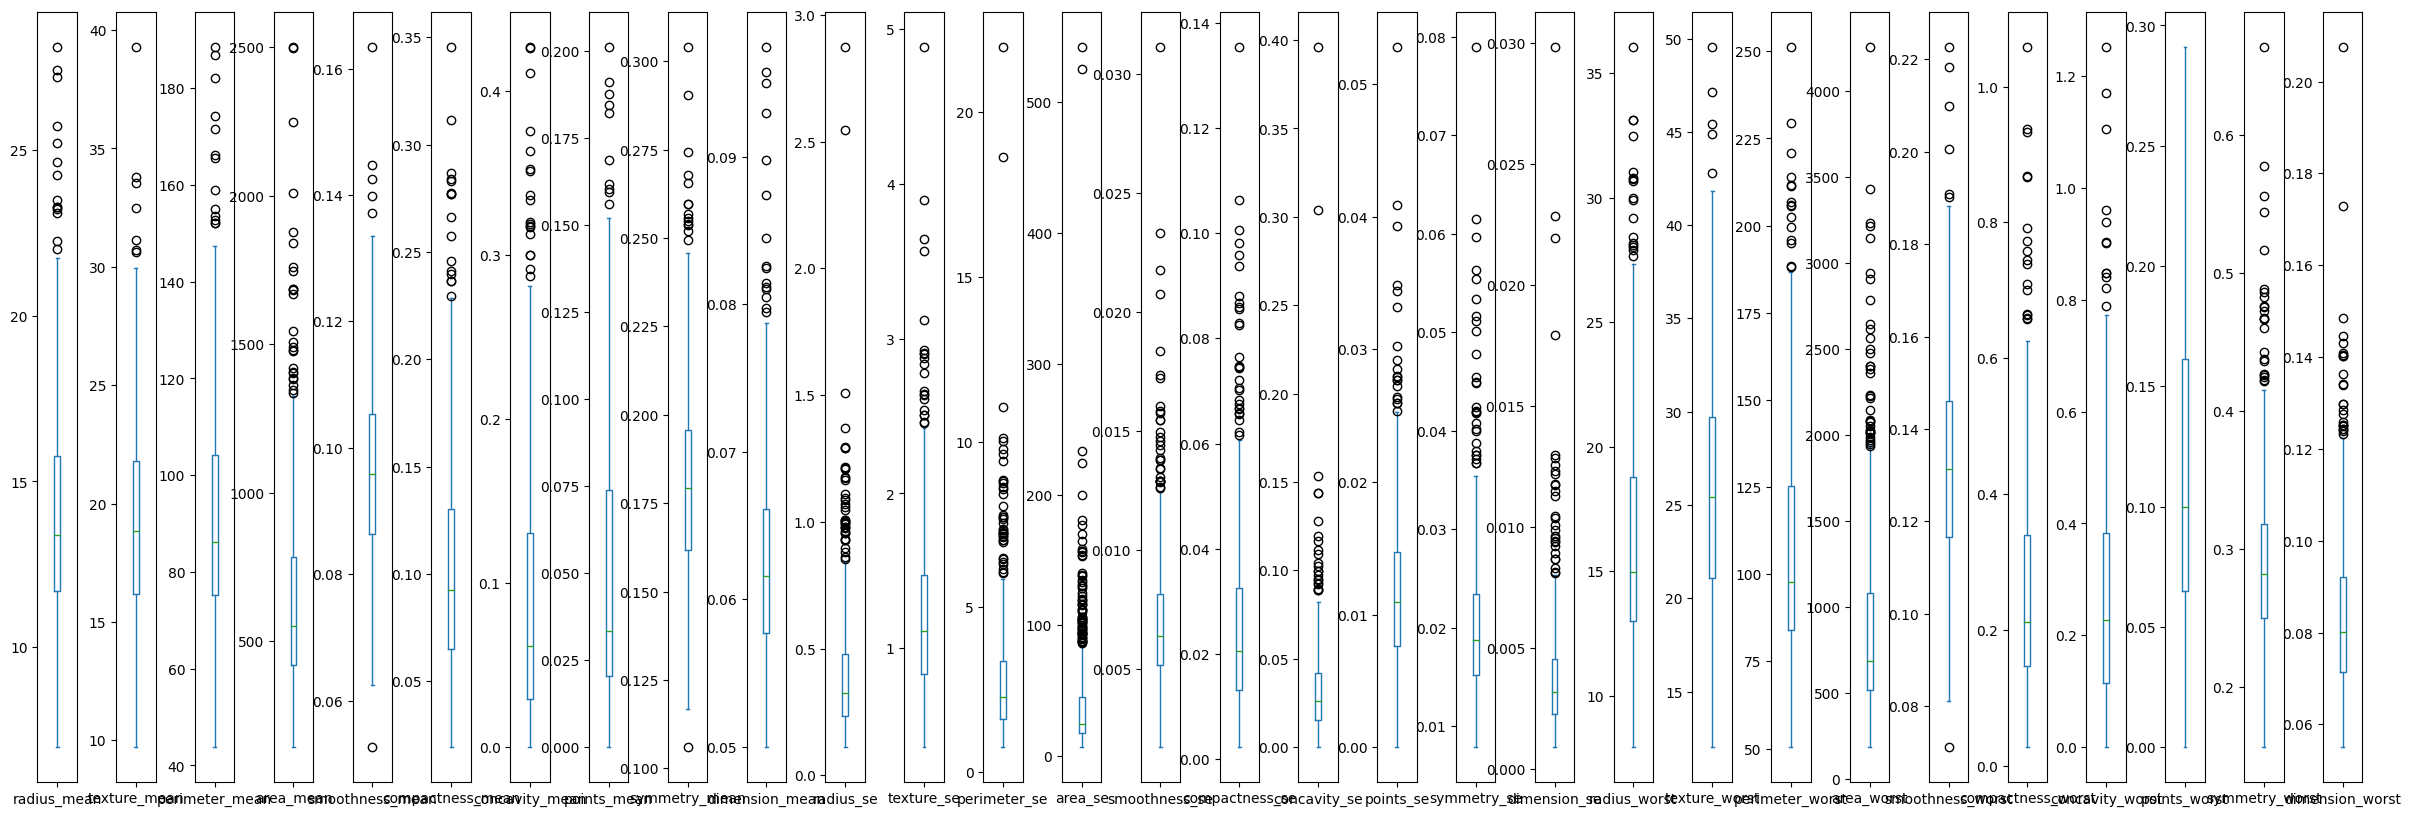

In [21]:
# Multiple boxplots in a single visualization.


X.plot(kind = 'box', subplots = True, sharey = False, figsize = (30, 10)) 

# increase spacing between subplots
plt.subplots_adjust(wspace = 1) # ws is the width of the padding between subplots, as a fraction of the average Axes width.
plt.show()

### Winsorization

In [22]:
winsor = Winsorizer(capping_method = 'iqr', # choose  IQR rule boundaries or gaussian for mean and std
                          tail = 'both', # cap left, right or both tails 
                          fold = 1.5,
                          variables = list(X.columns))

In [23]:
cl = winsor.fit(X)

In [24]:
X = cl.transform(X)

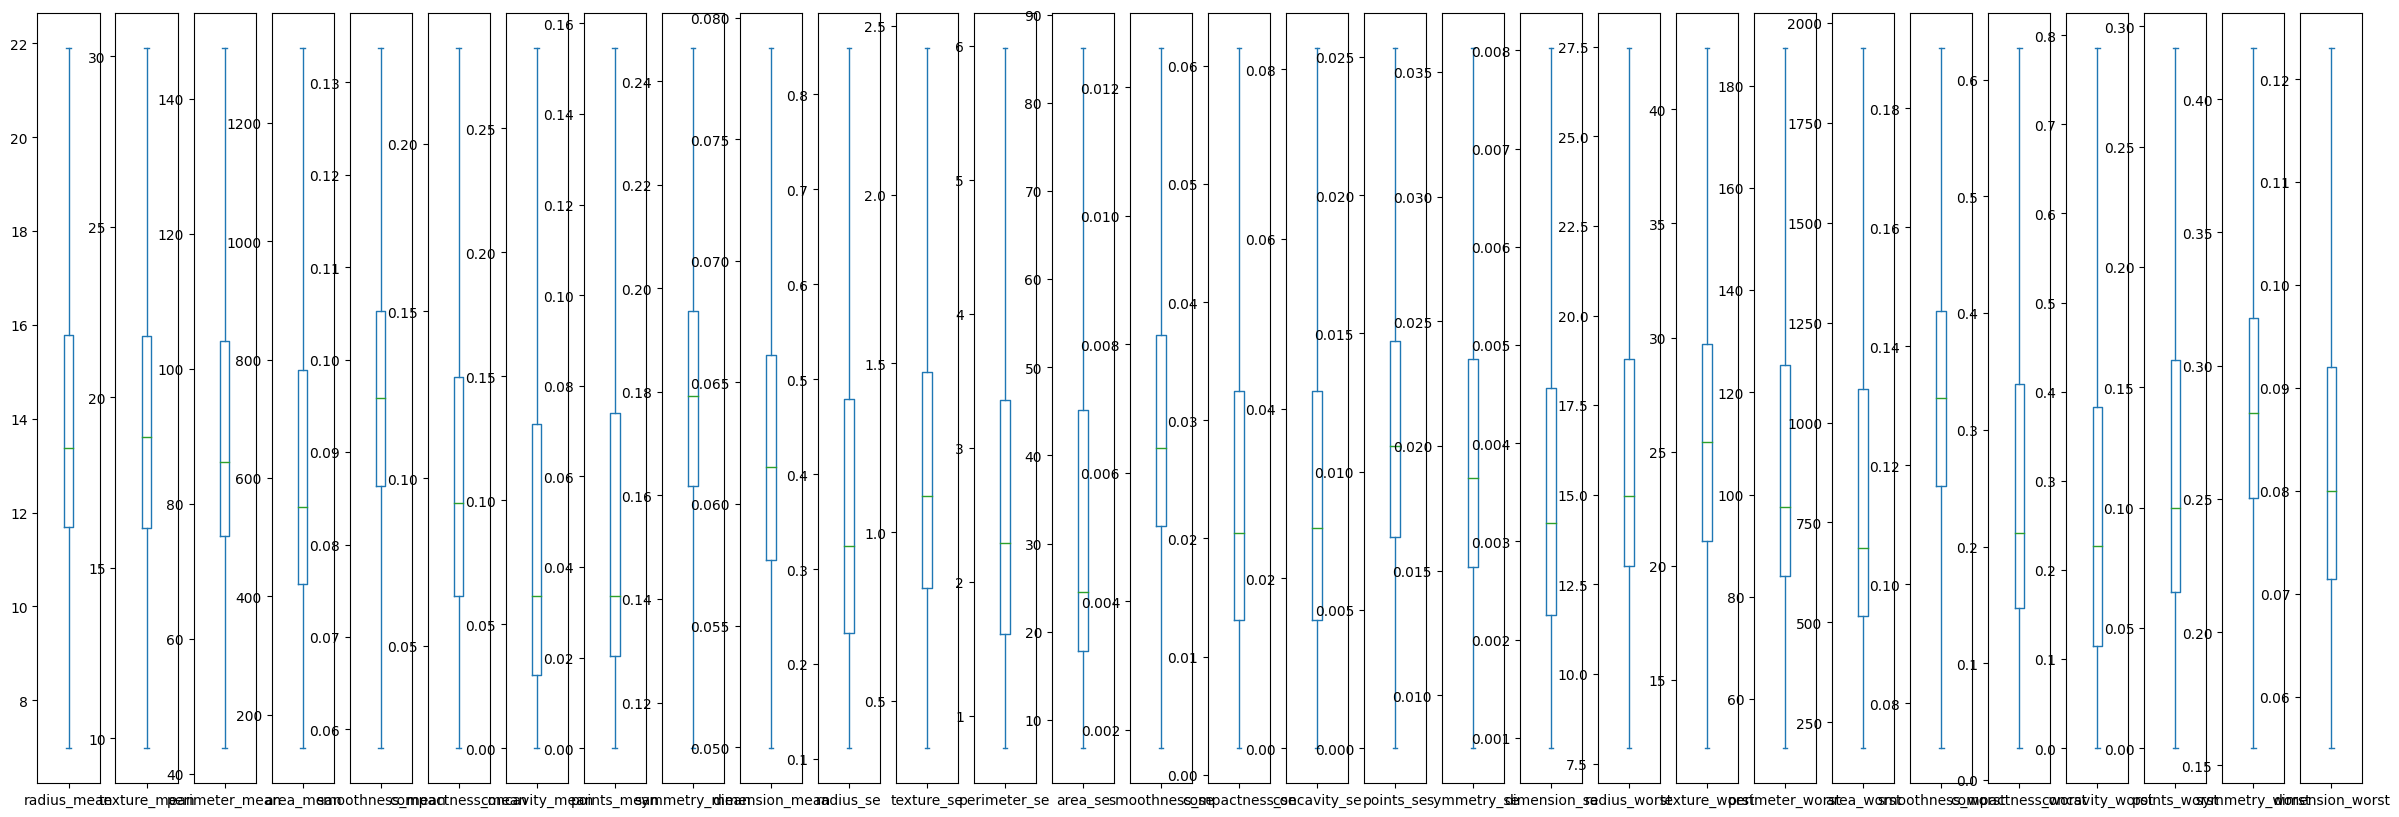

In [25]:
X.plot(kind = 'box', subplots = True, sharey = False, figsize = (30, 10)) 


# increase spacing between subplots
plt.subplots_adjust(wspace = 0.25) # ws is the width of the padding between subplots, as a fraction of the average Axes width.
plt.show()

### Scaling with MinMaxScaler

In [26]:
scale_pipeline = Pipeline([('scale', MinMaxScaler())])

In [27]:
preprocess_pipeline = ColumnTransformer([('scale', scale_pipeline, numeric_features )])

In [28]:
processed = preprocess_pipeline.fit(X)

In [29]:
X_norm = pd.DataFrame(processed.transform(X))
X_norm

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.357866,0.130509,0.338074,0.271052,0.591984,0.241015,0.141178,0.239428,0.626479,0.333102,...,0.285202,0.118069,0.267007,0.207723,0.561224,0.165611,0.158116,0.322715,0.480487,0.186406
1,0.242577,0.449963,0.245793,0.171542,0.513801,0.455553,0.226161,0.170965,0.599112,0.519278,...,0.202253,0.356164,0.203542,0.136770,0.414966,0.373895,0.243921,0.272371,0.523510,0.306459
2,0.272069,0.346725,0.261607,0.194200,0.656696,0.280348,0.107857,0.160481,0.445266,0.466829,...,0.229391,0.470320,0.215592,0.163370,0.547619,0.201631,0.135837,0.255361,0.545593,0.349713
3,0.288156,0.179206,0.281664,0.204007,0.771593,0.450296,0.164123,0.310350,0.487426,0.373741,...,0.204301,0.122309,0.190761,0.142021,0.545918,0.258330,0.110363,0.295911,0.204455,0.188318
4,0.550238,0.170441,0.519358,0.480470,0.285988,0.238769,0.120144,0.171935,0.450444,0.190344,...,0.423451,0.121005,0.395034,0.361846,0.340986,0.244155,0.173393,0.281031,0.351038,0.185670
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0.414840,0.414414,0.390434,0.332939,0.220351,0.193844,0.172055,0.185718,0.252959,0.192081,...,0.356887,0.387149,0.326383,0.286783,0.473639,0.282177,0.238829,0.359107,0.255092,0.209063
565,0.219787,0.243487,0.216094,0.150575,0.539422,0.345106,0.126801,0.131815,0.385355,0.697812,...,0.151050,0.243314,0.149571,0.098125,0.539966,0.227312,0.091178,0.140000,0.330859,0.439017
566,0.556271,0.618456,0.531604,0.479456,0.430468,0.410151,0.190326,0.211150,0.454882,0.458840,...,0.505376,0.522179,0.462954,0.449753,0.489796,0.504636,0.462126,0.421306,0.612983,0.627924
567,0.505999,0.207938,0.482812,0.423318,0.685750,0.349073,0.244149,0.420293,0.397929,0.390761,...,0.402970,0.160144,0.384809,0.322345,0.528912,0.200964,0.174793,0.367354,0.396345,0.339267


In [30]:
# Split data into train and test with Stratified sample technique

X_train, X_test, Y_train, Y_test = train_test_split(X_norm, Y, test_size = 0.2, stratify = Y, random_state = 0)

In [31]:
X_train.shape

(455, 30)

In [32]:
X_test.shape

(114, 30)

In [33]:
# Proportion of Target variable categories are consistent across train and test

print(Y_train.value_counts()/ 455)
print("\n")
print(Y_test.value_counts()/ 114)

1    0.626374
0    0.373626
Name: target, dtype: float64


1    0.631579
0    0.368421
Name: target, dtype: float64


# Random Forest Model

In [34]:
rf_Model = RandomForestClassifier()

#### hyperparameters

In [35]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 80, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [2, 4]

# Minimum number of samples required to split a node
min_samples_split = [2, 5]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]

# Method of selecting samples for training each tree
bootstrap = [True, False]

In [36]:
n_estimators = [int(x) for x in np.linspace(start=  10, stop = 80, num = 10)]
n_estimators

[10, 17, 25, 33, 41, 48, 56, 64, 72, 80]

In [37]:
# Create the param grid
param_grid = {'n_estimators': n_estimators,
             'max_features': max_features,
             'max_depth': max_depth,
             'min_samples_split': min_samples_split,
             'min_samples_leaf': min_samples_leaf,
             'bootstrap': bootstrap}

print(param_grid)

{'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72, 80], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 4], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2], 'bootstrap': [True, False]}


### Hyperparameter optimization with GridSearchCV

In [38]:
rf_Grid = GridSearchCV(estimator = rf_Model, param_grid = param_grid, cv = 10, verbose = 2, n_jobs = -1)

In [39]:
rf_Grid.fit(X_train, Y_train)

Fitting 10 folds for each of 320 candidates, totalling 3200 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False], 'max_depth': [2, 4],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72,
                                          80]},
             verbose=2)

In [40]:
rf_Grid.best_params_

{'bootstrap': True,
 'max_depth': 4,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 17}

In [41]:
cv_rf_grid = rf_Grid.best_estimator_
cv_rf_grid

RandomForestClassifier(max_depth=4, min_samples_split=5, n_estimators=17)

In [42]:
## Check Accuracy

In [43]:
# Evaluation on Test Data
test_pred = cv_rf_grid.predict(X_test)

accuracy_test = np.mean(test_pred == Y_test)
accuracy_test

0.9736842105263158

[Text(0.5, 1.0, 'Cancer Tumor Detection Confusion Matrix'),
 Text(0.5, 0, 'Predicted Value'),
 Text(0, 0.5, 'Actual Value')]

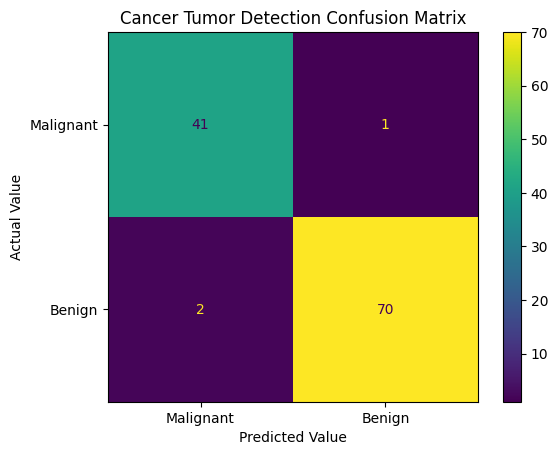

In [44]:
cm = skmet.confusion_matrix(Y_test, test_pred)

cmplot = skmet.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['Malignant', 'Benign'])
cmplot.plot()
cmplot.ax_.set(title = 'Cancer Tumor Detection Confusion Matrix', 
               xlabel = 'Predicted Value', ylabel = 'Actual Value')

In [45]:
print (f'Train Accuracy - : {rf_Grid.score(X_train, Y_train):.3f}')
print (f'Test Accuracy - : {rf_Grid.score(X_test, Y_test):.3f}')

Train Accuracy - : 0.991
Test Accuracy - : 0.974


In [46]:
# slight difference between training and test accuracy of 1%.

### Hyperparameter optimization with RandomizedSearchCV

In [47]:
rf_Random = RandomizedSearchCV(estimator = rf_Model, param_distributions = param_grid, cv = 10, verbose = 0, n_jobs = -1)

In [48]:
rf_Random.fit(X_train, Y_train)

RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [2, 4],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2],
                                        'min_samples_split': [2, 5],
                                        'n_estimators': [10, 17, 25, 33, 41, 48,
                                                         56, 64, 72, 80]})

In [49]:
rf_Random.best_params_

{'n_estimators': 80,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 4,
 'bootstrap': False}

In [50]:
cv_rf_random = rf_Random.best_estimator_
cv_rf_random

RandomForestClassifier(bootstrap=False, max_depth=4, max_features='auto',
                       min_samples_split=5, n_estimators=80)

In [51]:
# Evaluation on Test Data
test_pred_random = cv_rf_random.predict(X_test)

accuracy_test_random = np.mean(test_pred_random == Y_test)
accuracy_test_random

0.9649122807017544

[Text(0.5, 1.0, 'Cancer Tumor Detection Confusion Matrix'),
 Text(0.5, 0, 'Predicted Value'),
 Text(0, 0.5, 'Actual Value')]

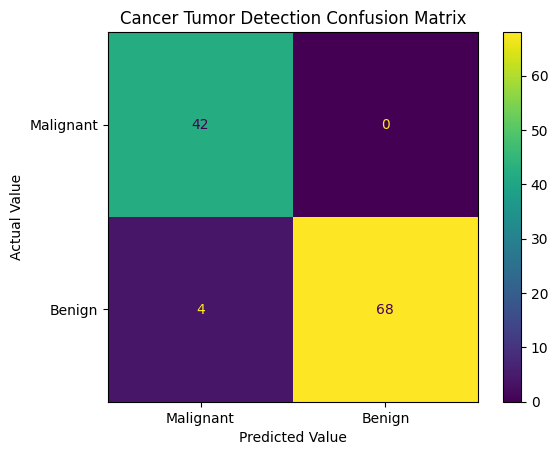

In [52]:
cm = skmet.confusion_matrix(Y_test, test_pred_random)

cmplot = skmet.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['Malignant', 'Benign'])
cmplot.plot()
cmplot.ax_.set(title = 'Cancer Tumor Detection Confusion Matrix', 
               xlabel = 'Predicted Value', ylabel = 'Actual Value')

In [53]:
print (f'Train Accuracy - : {rf_Random.score(X_train, Y_train):.3f}')
print (f'Test Accuracy - : {rf_Random.score(X_test, Y_test):.3f}')

Train Accuracy - : 0.991
Test Accuracy - : 0.965


In [54]:
# Overfit has increased as we used Randomsearch CV model to experiment and it did not do extensive training and test like GridSearchCV

## Cross Validation implementation

In [55]:
from sklearn.model_selection import cross_validate

def cross_validation(model, _X, _y, _cv = 5):
    
    '''Function to perform 5 Folds Cross-Validation
    Parameters
    ----------
    model: Python Class, default=None
          This is the machine learning algorithm to be used for training.
    _X: array
       This is the matrix of features.
    _y: array
       This is the target variable.
    _cv: int, default=5
      Determines the number of folds for cross-validation.
    Returns
    -------
    The function returns a dictionary containing the metrics 'accuracy', 'precision',
    'recall', 'f1' for both training set and validation set.
    '''
    _scoring = ['accuracy', 'precision', 'recall', 'f1']
    results = cross_validate(estimator=model,
                           X = _X,
                           y = _y,
                           cv = _cv,
                           scoring = _scoring,
                           return_train_score = True)

    return pd.DataFrame({"Training Accuracy scores": results['train_accuracy'],
          "Mean Training Accuracy": results['train_accuracy'].mean()*100,
          "Training Precision scores": results['train_precision'],
          "Mean Training Precision": results['train_precision'].mean(),
          "Training Recall scores": results['train_recall'],
          "Mean Training Recall": results['train_recall'].mean(),
          "Training F1 scores": results['train_f1'],
          "Mean Training F1 Score": results['train_f1'].mean(),
          "Validation Accuracy scores": results['test_accuracy'],
          "Mean Validation Accuracy": results['test_accuracy'].mean()*100,
          "Validation Precision scores": results['test_precision'],
          "Mean Validation Precision": results['test_precision'].mean(),
          "Validation Recall scores": results['test_recall'],
          "Mean Validation Recall": results['test_recall'].mean(),
          "Validation F1 scores": results['test_f1'],
          "Mean Validation F1 Score": results['test_f1'].mean()
          })

In [56]:
Random_forest_result = cross_validation(cv_rf_random, X_train, Y_train, 5)
Random_forest_result

,Training Accuracy scores,Mean Training Accuracy,Training Precision scores,Mean Training Precision,Training Recall scores,Mean Training Recall,Training F1 scores,Mean Training F1 Score,Validation Accuracy scores,Mean Validation Accuracy,Validation Precision scores,Mean Validation Precision,Validation Recall scores,Mean Validation Recall,Validation F1 scores,Mean Validation F1 Score
0,0.994505,99.230769,0.991304,0.987879,1.0,1.0,0.995633,0.9939,0.956044,95.604396,0.934426,0.946618,1.000000,0.985965,0.966102,0.965687
1,0.991758,99.230769,0.987013,0.987879,1.0,1.0,0.993464,0.9939,0.967033,95.604396,0.965517,0.946618,0.982456,0.985965,0.973913,0.965687
2,0.991758,99.230769,0.987013,0.987879,1.0,1.0,0.993464,0.9939,0.989011,95.604396,0.982759,0.946618,1.000000,0.985965,0.991304,0.965687
3,0.989011,99.230769,0.982759,0.987879,1.0,1.0,0.991304,0.9939,0.945055,95.604396,0.919355,0.946618,1.000000,0.985965,0.957983,0.965687
4,0.994505,99.230769,0.991304,0.987879,1.0,1.0,0.995633,0.9939,0.923077,95.604396,0.931034,0.946618,0.947368,0.985965,0.939130,0.965687


In [57]:
def plot_result(x_label, y_label, plot_title, train_data, val_data):
        '''Function to plot a grouped bar chart showing the training and validation
          results of the ML model in each fold after applying K-fold cross-validation.
         Parameters
         ----------
         x_label: str, 
            Name of the algorithm used for training e.g 'Decision Tree'
          
         y_label: str, 
            Name of metric being visualized e.g 'Accuracy'
         plot_title: str, 
            This is the title of the plot e.g 'Accuracy Plot'
         
         train_result: list, array
            This is the list containing either training precision, accuracy, or f1 score.
        
         val_result: list, array
            This is the list containing either validation precision, accuracy, or f1 score.
         Returns
         -------
         The function returns a Grouped Barchart showing the training and validation result
         in each fold.
        '''
        
        # Set size of plot
        plt.figure(figsize=(12, 6))
        labels = ["1st Fold", "2nd Fold", "3rd Fold", "4th Fold", "5th Fold"]
        X_axis = np.arange(len(labels))
        plt.ylim(0.40000, 1)
        plt.bar(X_axis - 0.2, train_data, 0.1, color = 'blue', label = 'Training')
        plt.bar(X_axis + 0.2, val_data, 0.1, color = 'red', label = 'Validation')
        plt.title(plot_title, fontsize=30)
        plt.xticks(X_axis, labels)
        plt.xlabel(x_label, fontsize=14)
        plt.ylabel(y_label, fontsize=14)
        plt.legend()
        plt.grid(True)
        plt.show()

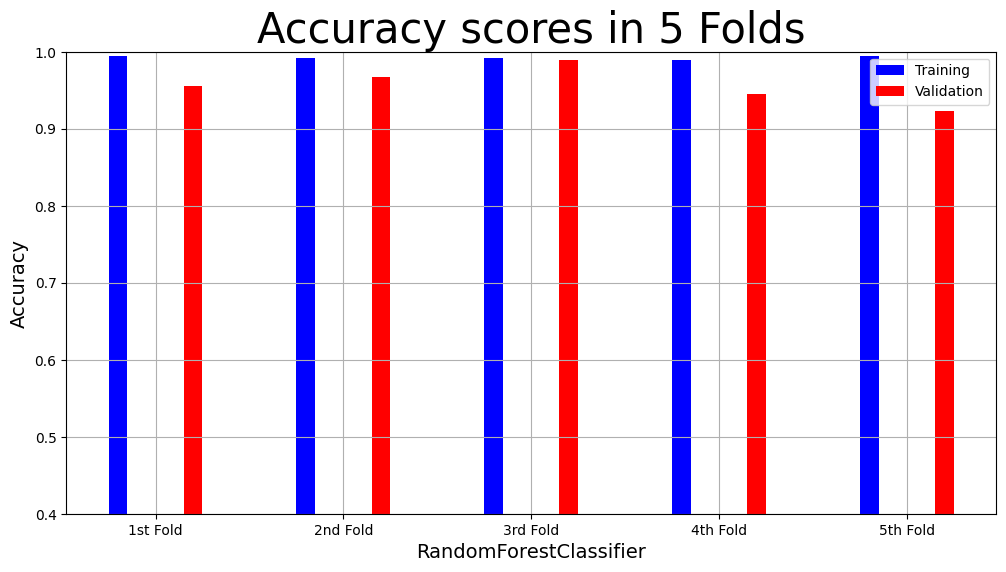

In [58]:
model_name = "RandomForestClassifier"
plot_result(model_name,
            "Accuracy",
            "Accuracy scores in 5 Folds",
            Random_forest_result["Training Accuracy scores"],
            Random_forest_result["Validation Accuracy scores"])

# Bagging Classifier Model

In [59]:
clftree = tree.DecisionTreeClassifier()

In [60]:
bag_clf = BaggingClassifier(base_estimator = clftree, n_estimators = 500, bootstrap = True, n_jobs = -1, random_state = 42)

In [61]:
# Fit the model
n_jobs = -1
bag_clf = BaggingClassifier(base_estimator = clftree, n_estimators = 500, bootstrap = True, n_jobs = -1, random_state = 42)
bagging = bag_clf.fit(X_train, Y_train)

In [62]:
print(confusion_matrix(Y_train, bagging.predict(X_train)))
print(accuracy_score(Y_train, bagging.predict(X_train)))
print('\n')
print(confusion_matrix(Y_test, bagging.predict(X_test)))
print(accuracy_score(Y_test, bagging.predict(X_test)))

[[170   0]
 [  0 285]]
1.0


[[42  0]
 [ 4 68]]
0.9649122807017544


In [63]:
bag_clf

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=500,
                  n_jobs=-1, random_state=42)

### Cross Validation implementation

In [64]:
from sklearn.model_selection import cross_validate

def cross_validation(model, _X, _y, _cv=5):
    
    '''Function to perform 5 Folds Cross-Validation
    Parameters
    ----------
    model: Python Class, default=None
          This is the machine learning algorithm to be used for training.
    _X: array
       This is the matrix of features.
    _y: array
       This is the target variable.
    _cv: int, default=5
      Determines the number of folds for cross-validation.
    Returns
    -------
    The function returns a dictionary containing the metrics 'accuracy', 'precision',
    'recall', 'f1' for both training set and validation set.
    '''
    _scoring = ['accuracy', 'precision', 'recall', 'f1']
    results = cross_validate(estimator=model,
                           X=_X,
                           y=_y,
                           cv=_cv,
                           scoring=_scoring,
                           return_train_score=True)

    return pd.DataFrame({"Training Accuracy scores": results['train_accuracy'],
          "Mean Training Accuracy": results['train_accuracy'].mean()*100,
          "Training Precision scores": results['train_precision'],
          "Mean Training Precision": results['train_precision'].mean(),
          "Training Recall scores": results['train_recall'],
          "Mean Training Recall": results['train_recall'].mean(),
          "Training F1 scores": results['train_f1'],
          "Mean Training F1 Score": results['train_f1'].mean(),
          "Validation Accuracy scores": results['test_accuracy'],
          "Mean Validation Accuracy": results['test_accuracy'].mean()*100,
          "Validation Precision scores": results['test_precision'],
          "Mean Validation Precision": results['test_precision'].mean(),
          "Validation Recall scores": results['test_recall'],
          "Mean Validation Recall": results['test_recall'].mean(),
          "Validation F1 scores": results['test_f1'],
          "Mean Validation F1 Score": results['test_f1'].mean()
          })

In [65]:
Bagging_cv_scores = cross_validation(bag_clf, X_train, Y_train, 5)
Bagging_cv_scores

,Training Accuracy scores,Mean Training Accuracy,Training Precision scores,Mean Training Precision,Training Recall scores,Mean Training Recall,Training F1 scores,Mean Training F1 Score,Validation Accuracy scores,Mean Validation Accuracy,Validation Precision scores,Mean Validation Precision,Validation Recall scores,Mean Validation Recall,Validation F1 scores,Mean Validation F1 Score
0,1.0,100.0,1.0,1.0,1.0,1.0,1.0,1.0,0.956044,96.263736,0.964912,0.968542,0.964912,0.97193,0.964912,0.970221
1,1.0,100.0,1.0,1.0,1.0,1.0,1.0,1.0,0.978022,96.263736,0.982456,0.968542,0.982456,0.97193,0.982456,0.970221
2,1.0,100.0,1.0,1.0,1.0,1.0,1.0,1.0,0.978022,96.263736,0.982456,0.968542,0.982456,0.97193,0.982456,0.970221
3,1.0,100.0,1.0,1.0,1.0,1.0,1.0,1.0,0.967033,96.263736,0.965517,0.968542,0.982456,0.97193,0.973913,0.970221
4,1.0,100.0,1.0,1.0,1.0,1.0,1.0,1.0,0.934066,96.263736,0.947368,0.968542,0.947368,0.97193,0.947368,0.970221


In [66]:
def plot_result(x_label, y_label, plot_title, train_data, val_data):
        # Set size of plot
        plt.figure(figsize=(12,6))
        labels = ["1st Fold", "2nd Fold", "3rd Fold", "4th Fold", "5th Fold"]
        X_axis = np.arange(len(labels))
        ax = plt.gca()
        plt.ylim(0.40000, 1)
        plt.bar(X_axis-0.2, train_data, 0.4, color='blue', label='Training')
        plt.bar(X_axis+0.2, val_data, 0.4, color='red', label='Validation')
        plt.title(plot_title, fontsize=30)
        plt.xticks(X_axis, labels)
        plt.xlabel(x_label, fontsize=14)
        plt.ylabel(y_label, fontsize=14)
        plt.legend()
        plt.grid(True)
        plt.show()

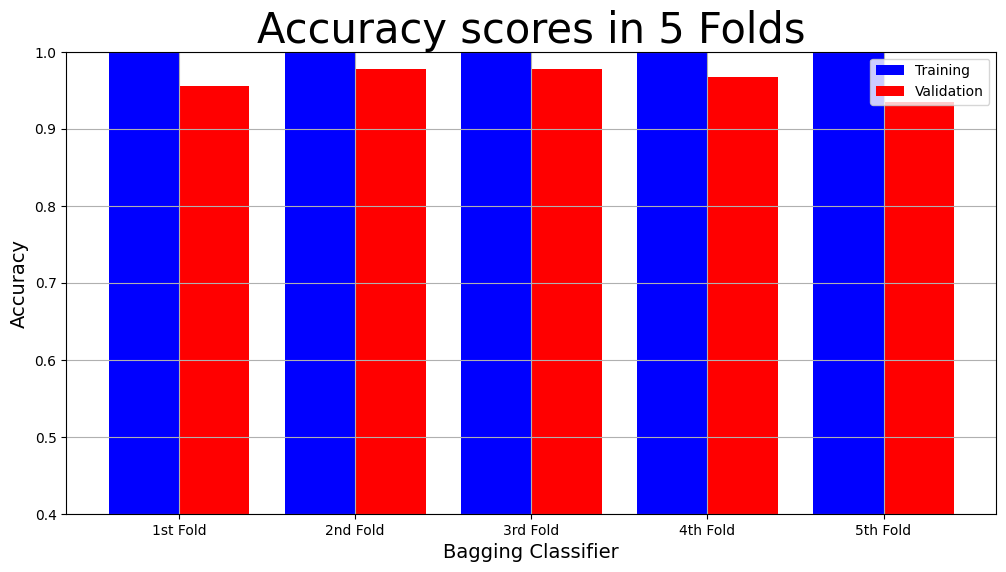

In [67]:
%matplotlib inline
model_name = "Bagging Classifier"
plot_result(model_name,
            "Accuracy",
            "Accuracy scores in 5 Folds",
            Bagging_cv_scores["Training Accuracy scores"],
            Bagging_cv_scores["Validation Accuracy scores"])

#  AdaBoosting

In [68]:
ada_clf = AdaBoostClassifier(learning_rate = 0.02, n_estimators = 5000)

ada_clf1 = ada_clf.fit(X_train, Y_train)

In [69]:
predictions = ada_clf1.predict(X_test)

In [70]:
ada_clf

AdaBoostClassifier(learning_rate=0.02, n_estimators=5000)

In [71]:
# Evaluation on Testing Data
confusion_matrix(Y_test, predictions)

array([[41,  1],
       [ 1, 71]], dtype=int64)

In [72]:
accuracy_score(Y_test, predictions)

0.9824561403508771

In [73]:
# Evaluation on Training Data
accuracy_score(Y_train, ada_clf1.predict(X_train))

1.0

# GradientBoosting

In [74]:
boost_clf = GradientBoostingClassifier()

boost_clf1 = boost_clf.fit(X_train, Y_train)

In [75]:
grad_pred = boost_clf1.predict(X_test)

In [76]:
boost_clf1

GradientBoostingClassifier()

In [77]:
print(confusion_matrix(Y_test, grad_pred))
print(accuracy_score(Y_test, grad_pred))

[[41  1]
 [ 3 69]]
0.9649122807017544


In [78]:
print(confusion_matrix(Y_train, boost_clf1.predict(X_train)))
print(accuracy_score(Y_train, boost_clf1.predict(X_train)))

[[170   0]
 [  0 285]]
1.0


In [79]:
# Hyperparameters
boost_clf2 = GradientBoostingClassifier(learning_rate = 0.02, n_estimators = 1000, max_depth = 1)

In [80]:
boost_clf_p = boost_clf2.fit(X_train, Y_train)

In [81]:
grad_pred_p = boost_clf_p.predict(X_test)

In [82]:
boost_clf_p

GradientBoostingClassifier(learning_rate=0.02, max_depth=1, n_estimators=1000)

In [83]:
from sklearn.metrics import accuracy_score, confusion_matrix
# Evaluation on Testing Data
print(confusion_matrix(Y_test, grad_pred_p))
print('\n')
print(accuracy_score(Y_test,grad_pred_p))

[[41  1]
 [ 2 70]]


0.9736842105263158


In [84]:
# Evaluation on Training Data
print(confusion_matrix(Y_train, boost_clf_p.predict(X_train)))
accuracy_score(Y_train, boost_clf_p.predict(X_train))

[[168   2]
 [  0 285]]


0.9956043956043956

# XGBoosting

In [85]:
xgb_clf = xgb.XGBClassifier(max_depth = 5, n_estimators = 1000, learning_rate = 0.3, n_jobs = -1)

# n_jobs – Number of parallel threads used to run xgboost.
# learning_rate (float) – Boosting learning rate (xgb’s “eta”)

In [86]:
xgb_clf1 = xgb_clf.fit(X_train, Y_train)

In [87]:
xgb_pred = xgb_clf1.predict(X_test)

In [88]:
# Evaluation on Testing Data

print(confusion_matrix(Y_test, xgb_pred))

accuracy_score(Y_test, xgb_pred)

[[40  2]
 [ 1 71]]


0.9736842105263158

<AxesSubplot: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

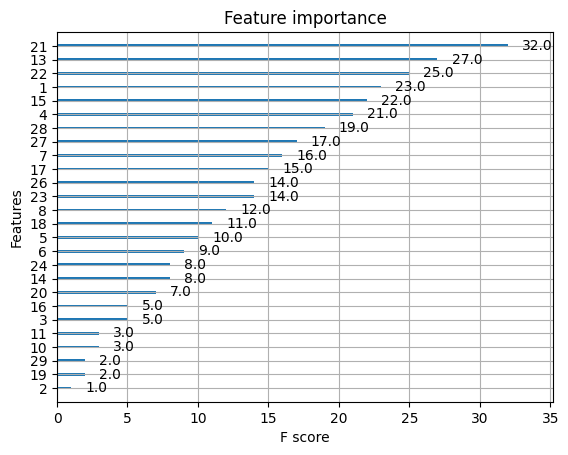

In [89]:
xgb.plot_importance(xgb_clf)

In [90]:
fi = pd.DataFrame(xgb_clf1.feature_importances_.reshape(1, -1), columns = X_train.columns)
fi

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.0,0.022505,0.022082,0.008949,0.005233,0.003278,0.013751,0.037122,0.000293,0.0,...,0.384289,0.01462,0.100276,0.024442,0.007338,0.0,0.013182,0.271884,0.001746,0.00496


# RandomizedSearchCV for XGB

In [91]:
xgb_clf = xgb.XGBClassifier(n_estimators = 500, learning_rate = 0.1, random_state = 42)

In [92]:
# Grid Search
param_test1 = {'max_depth': range(3, 10, 2), 'gamma': [0.1, 0.2, 0.3], 'subsample': [0.8, 0.9], 'colsample_bytree': [0.8, 0.9], 'rag_alpha': [1e-2, 0.1, 1]}

xgb_RandomGrid = RandomizedSearchCV(estimator = xgb_clf, param_distributions = param_test1, cv = 5, verbose = 2, n_jobs = 4)

In [93]:
Randomized_search1 = xgb_RandomGrid.fit(X_train, Y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[22:55:38] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "rag_alpha" } are not used.



In [94]:
cv_xg_clf = Randomized_search1.best_estimator_
cv_xg_clf

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.1, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=500, n_jobs=None, num_parallel_tree=None,
              predictor=None, rag_alpha=1, ...)

In [95]:
randomized_pred = cv_xg_clf.predict(X_test)

In [96]:
# Evaluation on Testing Data with model with hyperparameter
accuracy_score(Y_test, randomized_pred)

0.9912280701754386

In [97]:
Randomized_search1.best_params_

{'subsample': 0.9,
 'rag_alpha': 1,
 'max_depth': 3,
 'gamma': 0.1,
 'colsample_bytree': 0.8}

In [98]:
r_xgb = Randomized_search1.best_params_
r_xgb

{'subsample': 0.9,
 'rag_alpha': 1,
 'max_depth': 3,
 'gamma': 0.1,
 'colsample_bytree': 0.8}

In [99]:
randomized_pred_1 = cv_xg_clf.predict(X_train)

In [100]:
# Evaluation on Training Data with model with hyperparameters
accuracy_score(Y_train, randomized_pred_1)

1.0

# Voting

In [ ]:
# Combine all three Voting Ensembles

In [101]:
estimators = [('rf', cv_rf_grid), ('rand_rf', cv_rf_random), ('rand_xgb', cv_xg_clf)]
type(estimators)

list

In [102]:
# Instantiate the voting classifier
ensemble_H = VotingClassifier(estimators, voting = "hard")

In [103]:
# Fit classifier with the training data
hard_voting = ensemble_H.fit(X_train, Y_train)
hard_voting

[22:56:28] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "rag_alpha" } are not used.



VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(max_depth=4,
                                                     min_samples_split=5,
                                                     n_estimators=17)),
                             ('rand_rf',
                              RandomForestClassifier(bootstrap=False,
                                                     max_depth=4,
                                                     max_features='auto',
                                                     min_samples_split=5,
                                                     n_estimators=80)),
                             ('rand_xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsamp...
                                            gpu_id=None, grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=0.1, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=3,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            n_estimators=500, n_jobs=None,
                                            num_parallel_tree=None,
                                            predictor=None, rag_alpha=1, ...))])

In [104]:
ensemble_H.score(X_test, Y_test)

0.9649122807017544

In [105]:
ensemble_S = VotingClassifier(estimators, voting = "soft")

In [106]:
soft_voting = ensemble_S.fit(X_train, Y_train)

[22:56:30] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "rag_alpha" } are not used.



In [107]:
soft_voting.predict(X_test)

array([0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 0], dtype=int64)

In [108]:
ensemble_S.score(X_test, Y_test)

0.9736842105263158